In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(project_root)

print(project_root)

importmachine_learning.files_lib as FL
importmachine_learning.ml_lib as ML
import data_preprocessing.utils as utils
from data_extractor.data_extractor import load_df, extract_X_y_from_df 
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import json

/Users/gsk/documents/neuron/lie-detector-ai


In [9]:
df = load_df("../../data/")
# Filter the data and add the column 'label' depends what you need
df = df.query("desired_answer == answer and data_type in ['REAL', 'FAKE']")
df['label'] = df.apply(lambda x: 1 if x.block_no in [1,3] else 0, axis = 1)
df.head()

Opening raw data file ../../data/1299BF1A/EEG_ExperimentBlock.HONEST_RESPONSE_TO_TRUE_IDENTITY_raw.fif...
    Range : 0 ... 70174 =      0.000 ...   280.696 secs
Ready.
Reading 0 ... 70174  =      0.000 ...   280.696 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass,

,subject,block_no,duration,field,data_type,answer,eeg,desired_answer,label
1,1299BF1A,1,0.840,BIRTH_DATE,REAL,YES,"<Epochs | 1 events (good & bad), 0 – 1 s (base...",YES,1
2,1299BF1A,1,0.744,HOMETOWN,REAL,YES,"<Epochs | 1 events (good & bad), 0 – 1 s (base...",YES,1
3,1299BF1A,1,0.676,HOMETOWN,REAL,YES,"<Epochs | 1 events (good & bad), 0 – 1 s (base...",YES,1
4,1299BF1A,1,0.620,HOMETOWN,REAL,YES,"<Epochs | 1 events (good & bad), 0 – 1 s (base...",YES,1
6,1299BF1A,1,0.652,NAME,REAL,YES,"<Epochs | 1 events (good & bad), 0 – 1 s (base...",YES,1


In [10]:
df.head()

,subject,block_no,duration,field,data_type,answer,eeg,desired_answer,label
1,1299BF1A,1,0.840,BIRTH_DATE,REAL,YES,"<Epochs | 1 events (good & bad), 0 – 1 s (base...",YES,1
2,1299BF1A,1,0.744,HOMETOWN,REAL,YES,"<Epochs | 1 events (good & bad), 0 – 1 s (base...",YES,1
3,1299BF1A,1,0.676,HOMETOWN,REAL,YES,"<Epochs | 1 events (good & bad), 0 – 1 s (base...",YES,1
4,1299BF1A,1,0.620,HOMETOWN,REAL,YES,"<Epochs | 1 events (good & bad), 0 – 1 s (base...",YES,1
6,1299BF1A,1,0.652,NAME,REAL,YES,"<Epochs | 1 events (good & bad), 0 – 1 s (base...",YES,1


In [4]:
X,y = extract_X_y_from_df(df)

Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw 

/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  eeg = row['eeg'].get_data()


Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw 

/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  eeg = row['eeg'].get_data()


0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using dat

/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  eeg = row['eeg'].get_data()
/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  eeg = row['eeg'].get_data()


0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using dat

/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  eeg = row['eeg'].get_data()


Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
1 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw 

/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  eeg = row['eeg'].get_data()


Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw 

/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  eeg = row['eeg'].get_data()


0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using dat

/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  eeg = row['eeg'].get_data()


Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw 

/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  eeg = row['eeg'].get_data()


Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw 

/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  eeg = row['eeg'].get_data()
/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  eeg = row['eeg'].get_data()


Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw 

/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  eeg = row['eeg'].get_data()
/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  eeg = row['eeg'].get_data()


Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw 

/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  eeg = row['eeg'].get_data()


Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw 

/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  eeg = row['eeg'].get_data()


0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using dat

/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  eeg = row['eeg'].get_data()
/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  eeg = row['eeg'].get_data()


Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw 

/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  eeg = row['eeg'].get_data()


Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw 

In [5]:
X,y = extract_X_y_from_df(df)

Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data f

/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: epochs._get_data() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.
  eeg = row['eeg'].get_data()


Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data f

/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: epochs._get_data() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.
  eeg = row['eeg'].get_data()


Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data f

/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: epochs._get_data() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.
  eeg = row['eeg'].get_data()
/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: epochs._get_data() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.
  eeg = row['eeg'].get_data()


Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data f

/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: epochs._get_data() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.
  eeg = row['eeg'].get_data()
/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: epochs._get_data() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.
  eeg = row['eeg'].get_data()


Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data f

/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: epochs._get_data() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.
  eeg = row['eeg'].get_data()


Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data f

/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: epochs._get_data() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.
  eeg = row['eeg'].get_data()


Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data f

/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: epochs._get_data() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.
  eeg = row['eeg'].get_data()


Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data f

/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: epochs._get_data() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.
  eeg = row['eeg'].get_data()
/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: epochs._get_data() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.
  eeg = row['eeg'].get_data()


Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data f

/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: epochs._get_data() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.
  eeg = row['eeg'].get_data()


Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 0 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data f

/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: epochs._get_data() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.
  eeg = row['eeg'].get_data()
/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: epochs._get_data() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.
  eeg = row['eeg'].get_data()


Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data f

/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: epochs._get_data() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.
  eeg = row['eeg'].get_data()


Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data f

/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: epochs._get_data() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.
  eeg = row['eeg'].get_data()
/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: epochs._get_data() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.
  eeg = row['eeg'].get_data()


Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data f

/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: epochs._get_data() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.
  eeg = row['eeg'].get_data()


Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data f

In [6]:
param_grid = {
    'classifier__n_neighbors': [3],
    'classifier__weights': ['uniform'],
    'classifier__metric': ['euclidean']
}

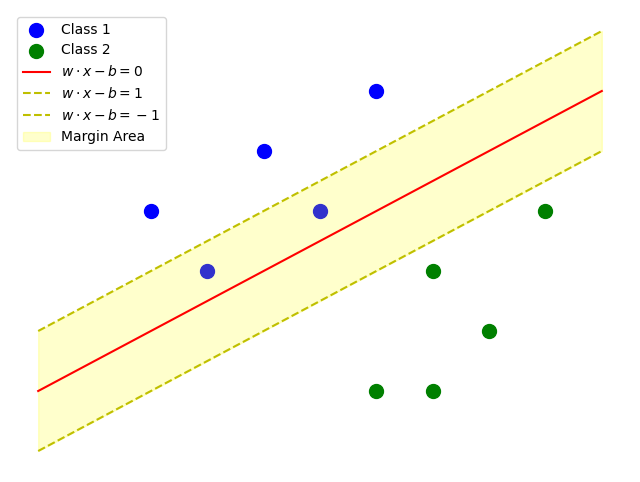

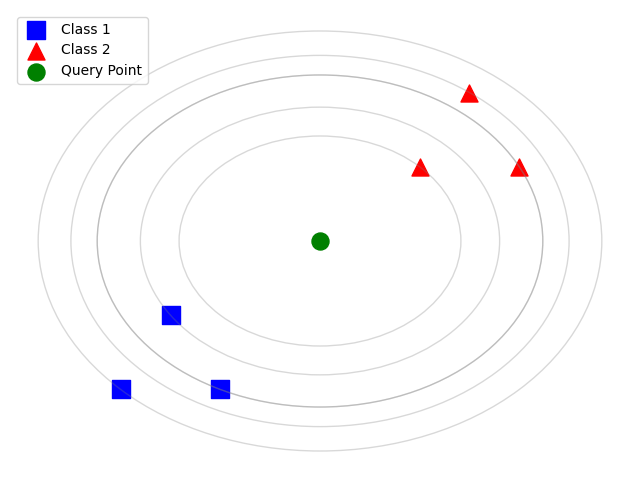

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# SVM Visualization (Theoretical)
def theoretical_svm():
    # Generate points for the margin and decision boundary
    x = np.linspace(0, 10, 100)
    decision_boundary = 0.5 * x + 2
    margin_1 = decision_boundary + 1
    margin_2 = decision_boundary - 1

    plt.figure(figsize=(8, 6))
    
    # Plot two classes of points
    class_1 = np.array([[2, 5], [4, 6], [6, 7], [3, 4], [5, 5]])
    class_2 = np.array([[7, 2], [8, 3], [6, 2], [7, 4], [9, 5]])
    
    plt.scatter(class_1[:, 0], class_1[:, 1], c='blue', label='Class 1', s=100)
    plt.scatter(class_2[:, 0], class_2[:, 1], c='green', label='Class 2', s=100)

    # Plot decision boundary and margins
    plt.plot(x, decision_boundary, 'r-', label=r'$w \cdot x - b = 0$')
    plt.plot(x, margin_1, 'y--', label=r'$w \cdot x - b = 1$')
    plt.plot(x, margin_2, 'y--', label=r'$w \cdot x - b = -1$')
    
    plt.fill_between(x, margin_1, margin_2, color='yellow', alpha=0.2, label='Margin Area')
    plt.legend(loc="upper left")
    # plt.title("Theoretical SVM Visualization")
    plt.axis('off')
    plt.show()

# kNN Visualization (Theoretical)
def theoretical_knn():
    # Points for classes
    class_1 = np.array([[2, 2], [3, 2], [2.5, 3]])
    class_2 = np.array([[5, 5], [6, 5], [5.5, 6]])
    query_point = np.array([4, 4])  # Query point

    plt.figure(figsize=(8, 6))
    
    # Plot points and query point
    plt.scatter(class_1[:, 0], class_1[:, 1], c='blue', s=150, label='Class 1', marker='s')
    plt.scatter(class_2[:, 0], class_2[:, 1], c='red', s=150, label='Class 2', marker='^')
    plt.scatter(query_point[0], query_point[1], c='green', s=150, label='Query Point', marker='o')
    
    # Draw circles around query point
    for point in np.vstack([class_1, class_2]):
        distance = np.linalg.norm(point - query_point)
        circle = plt.Circle(query_point, distance, color='gray', fill=False, alpha=0.3)
        plt.gca().add_patch(circle)

    # plt.title("Theoretical kNN Visualization")
    plt.legend(loc="upper left")
    plt.axis('off')
    plt.show()

# Execute the visualizations
theoretical_svm()
theoretical_knn()


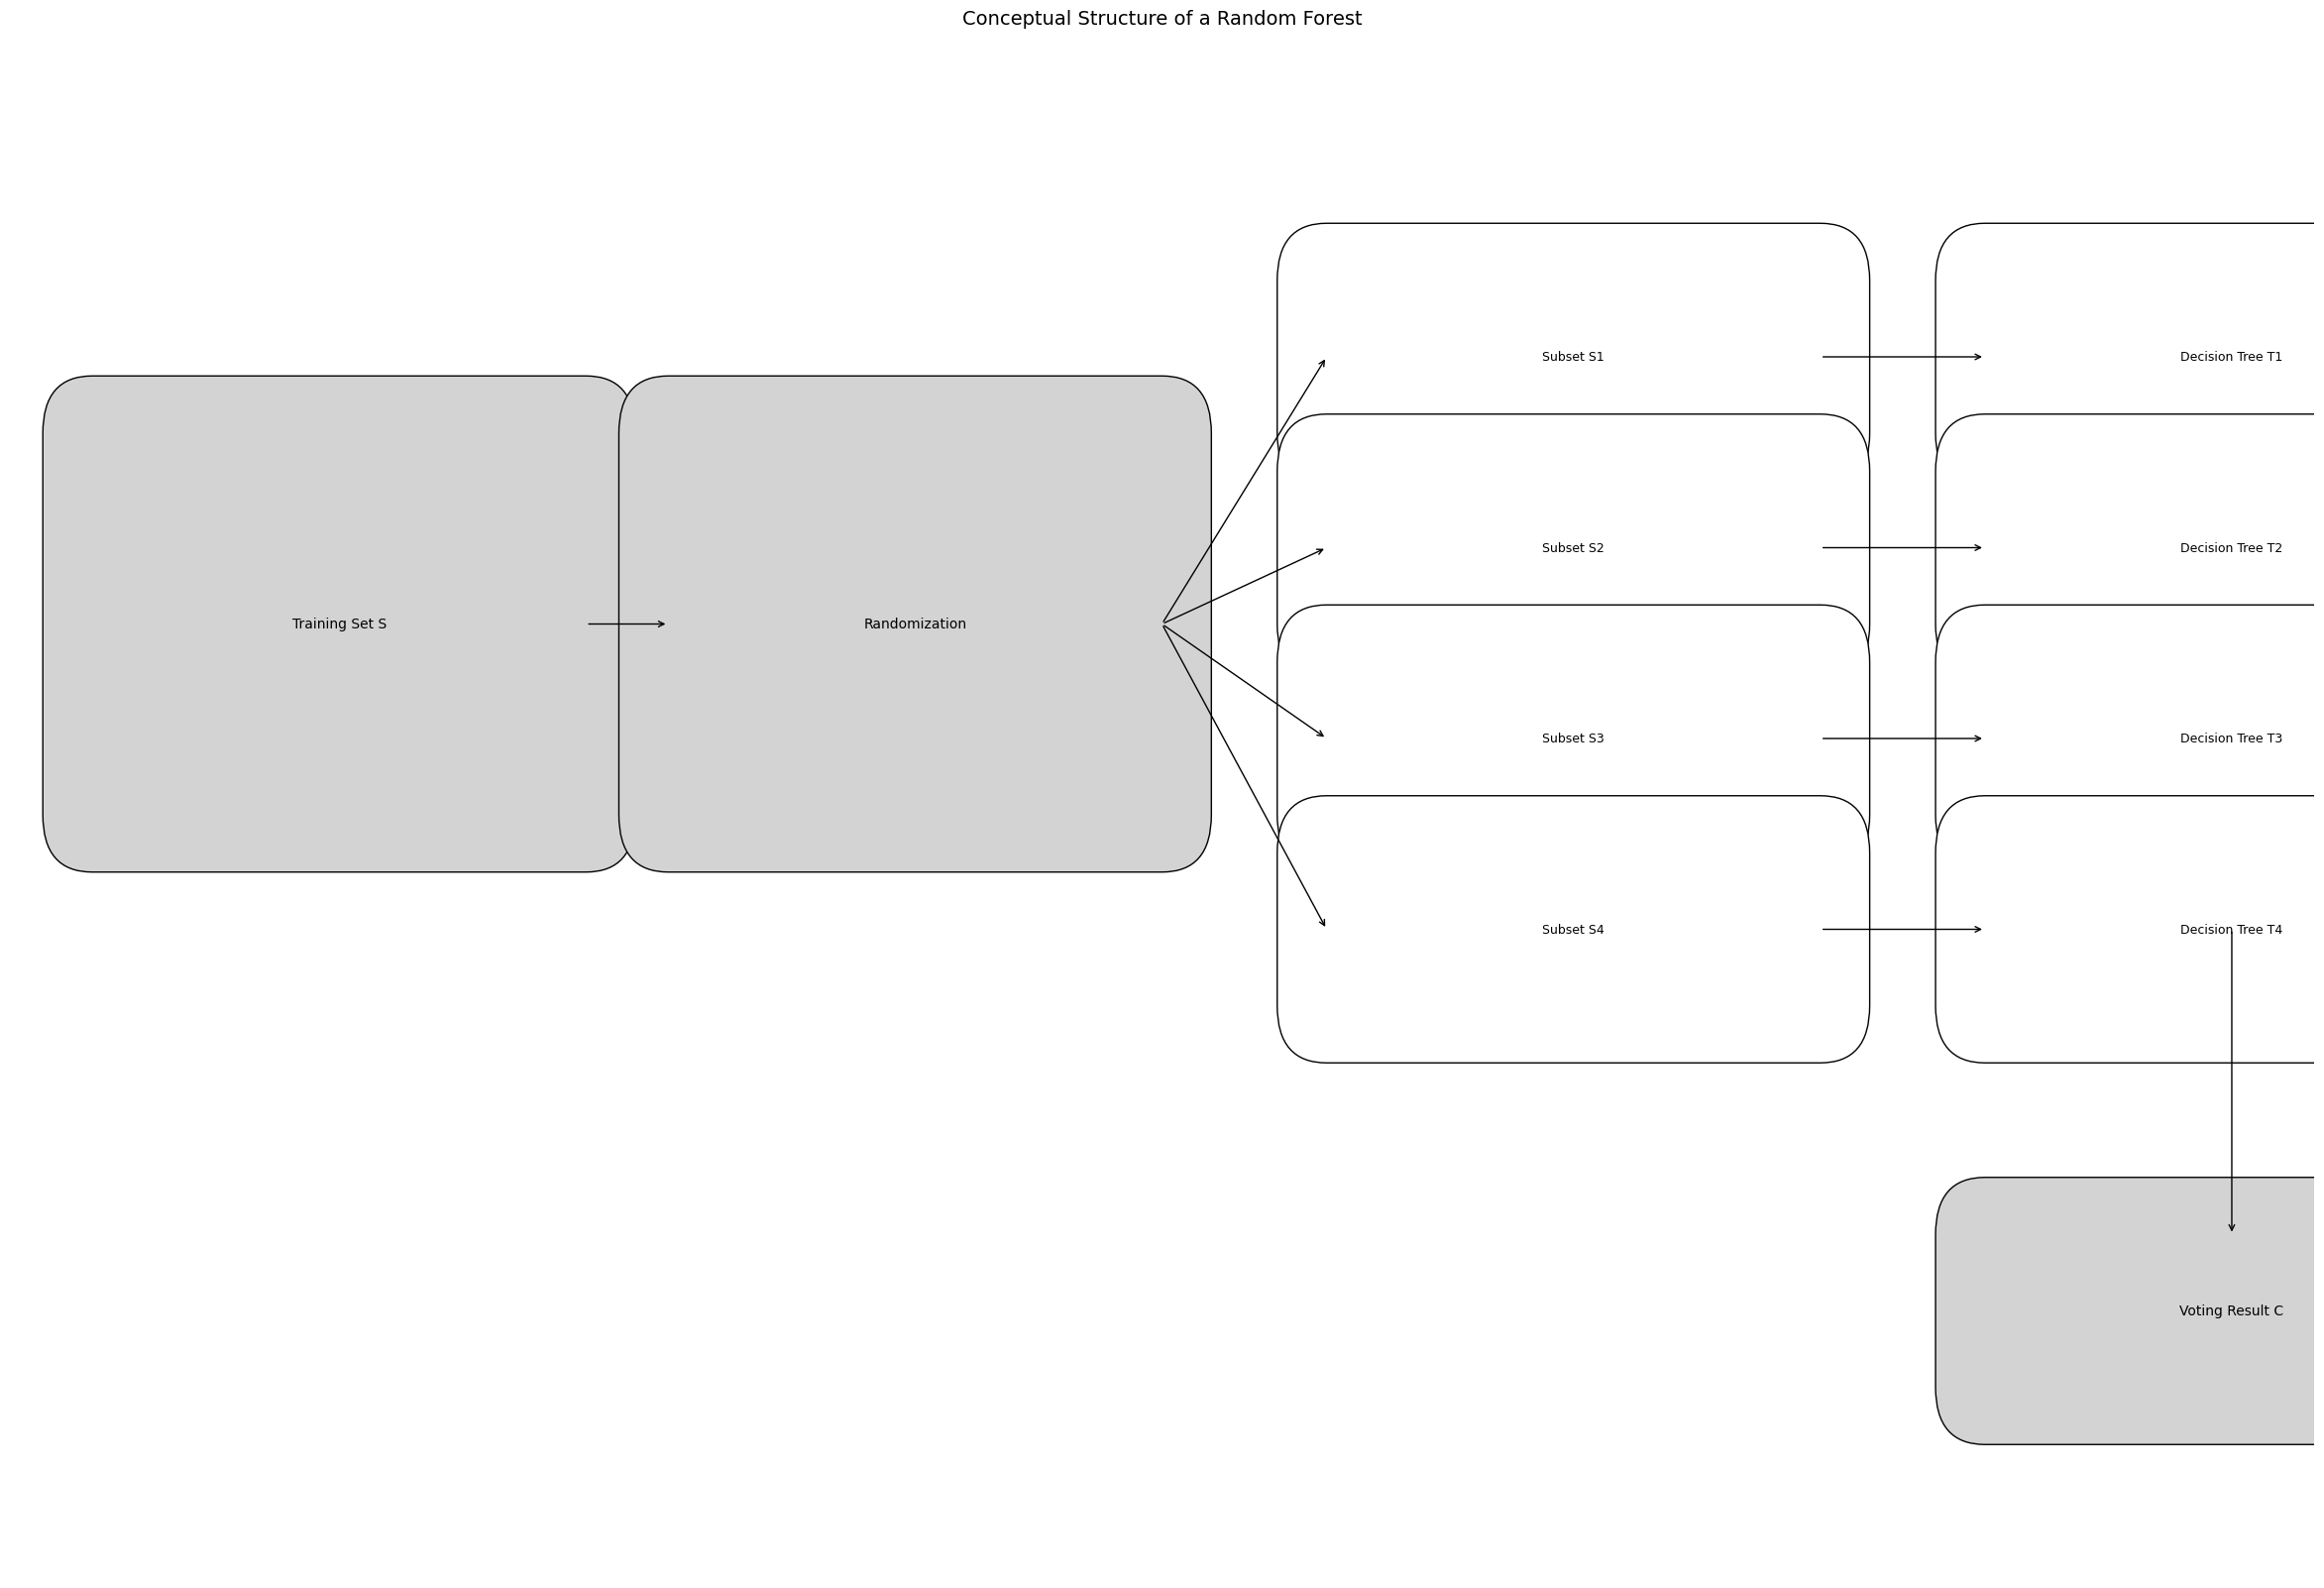

In [6]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch

# Function to draw a conceptual diagram for a Random Forest
def draw_random_forest_diagram():
    fig, ax = plt.subplots(figsize=(30, 20))
    ax.set_xlim(0, 14)
    ax.set_ylim(0, 8)
    ax.axis('off')

    # Add training process box
    ax.add_patch(FancyBboxPatch((0.5, 4), 3, 2, boxstyle="round,pad=0.3", edgecolor="black", facecolor="lightgrey"))
    ax.text(2, 5, "Training Set S", ha="center", va="center", fontsize=10)
    
    # Add randomization process box
    ax.add_patch(FancyBboxPatch((4, 4), 3, 2, boxstyle="round,pad=0.3", edgecolor="black", facecolor="lightgrey"))
    ax.text(5.5, 5, "Randomization", ha="center", va="center", fontsize=10)
    
    # Add subset boxes
    subset_positions = [(8, 6), (8, 5), (8, 4), (8, 3)]
    for i, pos in enumerate(subset_positions, 1):
        ax.add_patch(FancyBboxPatch(pos, 3, 0.8, boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))
        ax.text(pos[0] + 1.5, pos[1] + 0.4, f"Subset S{i}", ha="center", va="center", fontsize=9)

    # Add decision tree boxes
    tree_positions = [(12, 6), (12, 5), (12, 4), (12, 3)]
    for i, pos in enumerate(tree_positions, 1):
        ax.add_patch(FancyBboxPatch(pos, 3, 0.8, boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))
        ax.text(pos[0] + 1.5, pos[1] + 0.4, f"Decision Tree T{i}", ha="center", va="center", fontsize=9)
    
    # Add voting result box
    ax.add_patch(FancyBboxPatch((12, 1), 3, 0.8, boxstyle="round,pad=0.3", edgecolor="black", facecolor="lightgrey"))
    ax.text(13.5, 1.4, "Voting Result C", ha="center", va="center", fontsize=10)
    
    # Draw arrows
    arrow_props = dict(facecolor='black', arrowstyle="->", lw=1)
    ax.annotate("", xy=(4, 5), xytext=(3.5, 5), arrowprops=arrow_props)
    for pos in subset_positions:
        ax.annotate("", xy=(pos[0], pos[1] + 0.4), xytext=(7, 5), arrowprops=arrow_props)
    for pos in tree_positions:
        ax.annotate("", xy=(pos[0], pos[1] + 0.4), xytext=(11, pos[1] + 0.4), arrowprops=arrow_props)
    ax.annotate("", xy=(13.5, 1.8), xytext=(13.5, 3.4), arrowprops=arrow_props)

    plt.title("Conceptual Structure of a Random Forest", fontsize=14, pad=20)
    plt.show()

draw_random_forest_diagram()


Confusion Matrices - Random42 Split


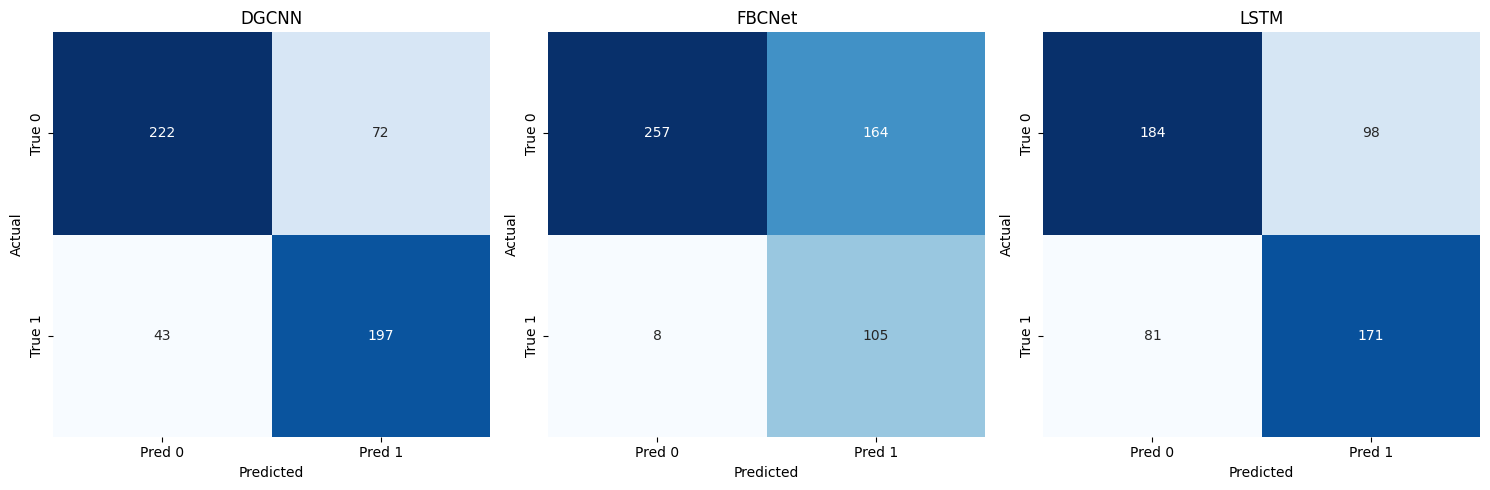

Confusion Matrices - Random2137 Split


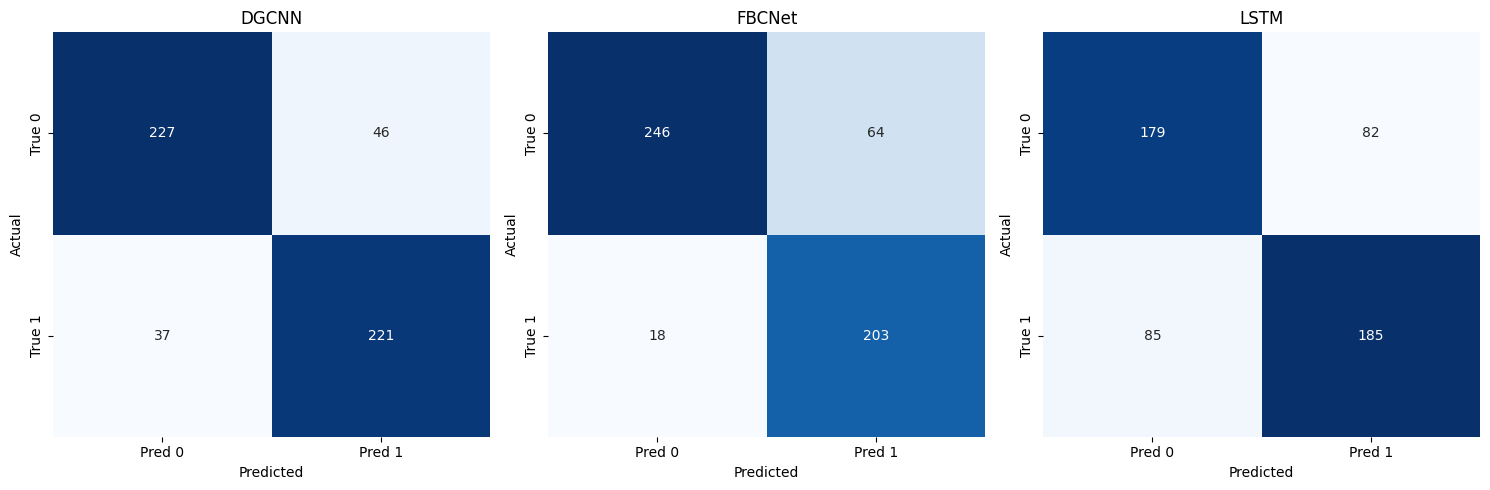

Confusion Matrices - SmallTest42 Split


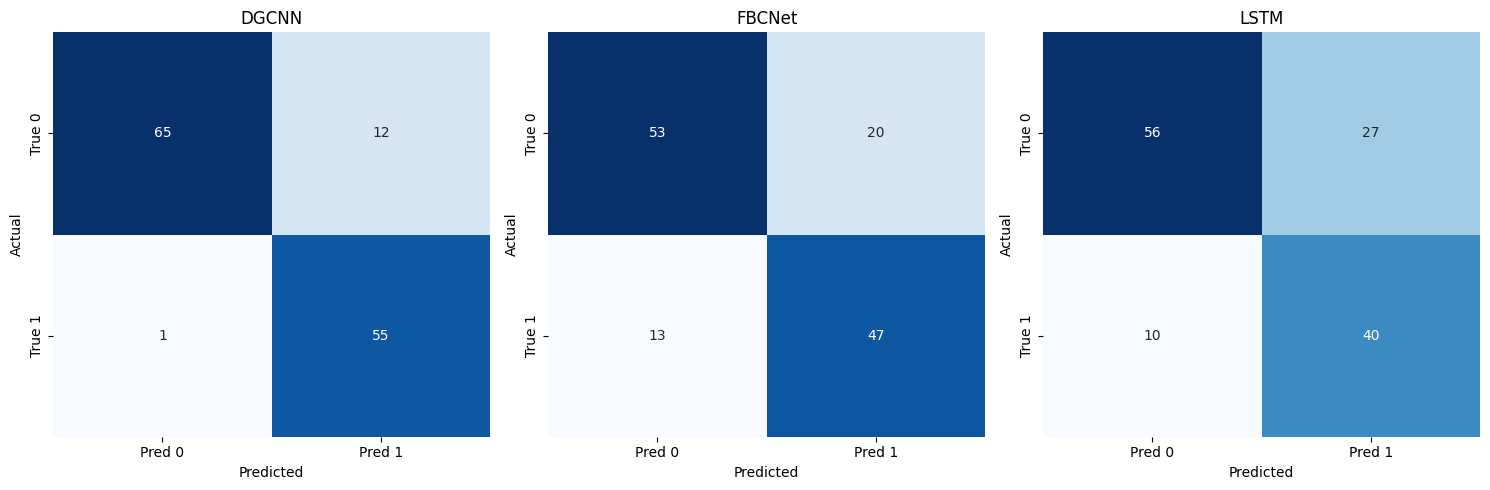

Confusion Matrices - SubjectBased42 Split


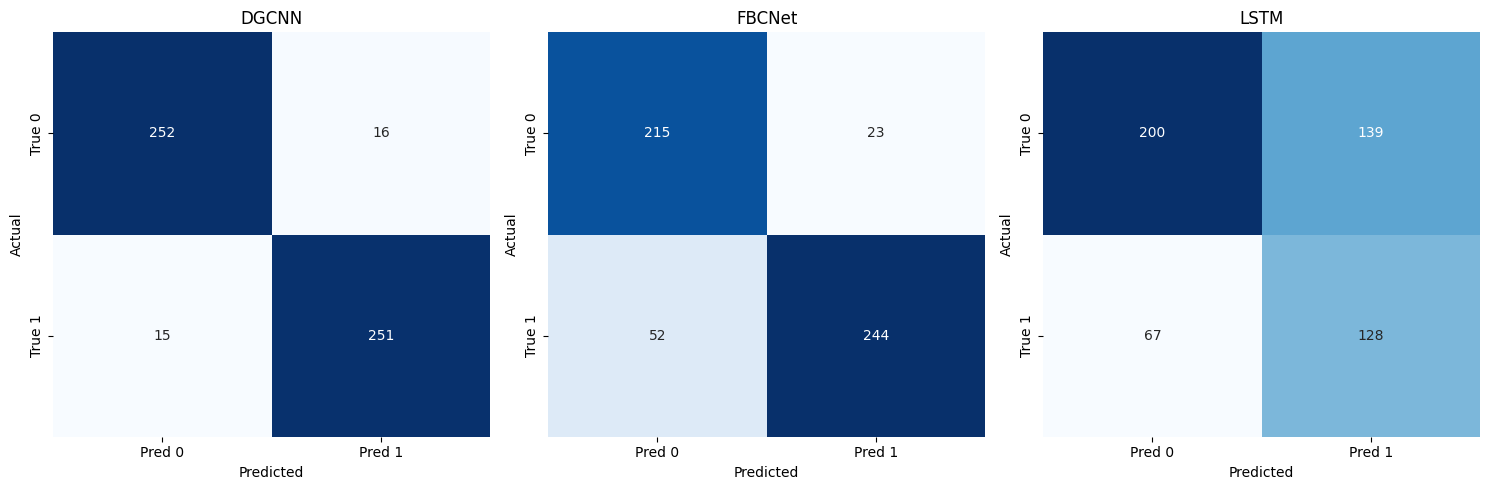

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define confusion matrix data for each split and model
data = {
    "Random42": {
        "DGCNN": [[222, 72], [43, 197]],
        "FBCNet": [[257, 164], [8, 105]],
        "LSTM": [[184, 98], [81, 171]],
    },
    "Random2137": {
        "DGCNN": [[227, 46], [37, 221]],
        "FBCNet": [[246, 64], [18, 203]],
        "LSTM": [[179, 82], [85, 185]],
    },
    "SmallTest42": {
        "DGCNN": [[65, 12], [1, 55]],
        "FBCNet": [[53, 20], [13, 47]],
        "LSTM": [[56, 27], [10, 40]],
    },
    "SubjectBased42": {
        "DGCNN": [[252, 16], [15, 251]],
        "FBCNet": [[215, 23], [52, 244]],
        "LSTM": [[200, 139], [67, 128]],
    },
}

# Define function to plot confusion matrices
def plot_confusion_matrices(data, split_name):
    models = data[split_name].keys()
    num_models = len(models)
    fig, axes = plt.subplots(1, num_models, figsize=(5 * num_models, 5))
    print(f"Confusion Matrices - {split_name} Split")

    for i, (model, matrix) in enumerate(data[split_name].items()):
        ax = axes[i] if num_models > 1 else axes
        sns.heatmap(
            np.array(matrix),
            annot=True,
            fmt="d",
            cmap="Blues",
            cbar=False,
            xticklabels=["Pred 0", "Pred 1"],
            yticklabels=["True 0", "True 1"],
            ax=ax,
        )
        ax.set_title(model)
        ax.set_xlabel("Predicted")
        ax.set_ylabel("Actual")

    plt.tight_layout()
    plt.show()

# Plot confusion matrices for all splits
for split_name in data.keys():
    plot_confusion_matrices(data, split_name)
